# CRISP-DM Analysis on Used Cars Dataset

## 1. Business Understanding

The goal of this analysis is to understand what factors influence the price of used cars. This will help used car dealerships optimize their inventory and pricing strategies. By identifying key attributes that affect pricing, dealerships can make informed decisions on which cars to stock, how to price them, and what features to highlight in sales efforts.

## 2. Data Understanding and Preparation

In [12]:
# Loading the dataset to explore its structure and contents
import pandas as pd

file_path = '/content/vehicles.csv'
df = pd.read_csv(file_path)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The dataset contains various attributes of used cars, such as price, year, manufacturer, model, condition, cylinders, fuel type, odometer, title status, transmission, VIN, drive type, size, type, paint color, and location information like state and region. However, there are significant missing values across several key columns, which need to be addressed in the data preparation phase.

In [2]:
# Step 1: Data Understanding and Cleaning
# Checking the data types and missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
# Handling missing values by removing rows or filling with appropriate strategies
df_cleaned = df.dropna(subset=['price'])
df_cleaned['year'].fillna(df_cleaned['year'].median(), inplace=True)
for col in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']:
    df_cleaned[col].fillna('Unknown', inplace=True)
df_cleaned['odometer'].fillna(df_cleaned['odometer'].median(), inplace=True)
df_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2013.0,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,NaN,Unknown,NaN,Unknown,Unknown,az
1,7218891961,fayetteville,11900,2013.0,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,NaN,Unknown,NaN,Unknown,Unknown,ar
2,7221797935,florida keys,21000,2013.0,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,NaN,Unknown,NaN,Unknown,Unknown,fl
3,7222270760,worcester / central MA,1500,2013.0,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,NaN,Unknown,NaN,Unknown,Unknown,ma
4,7210384030,greensboro,4900,2013.0,Unknown,Unknown,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,NaN,Unknown,NaN,Unknown,Unknown,nc


## 3. Exploratory Data Analysis (EDA)

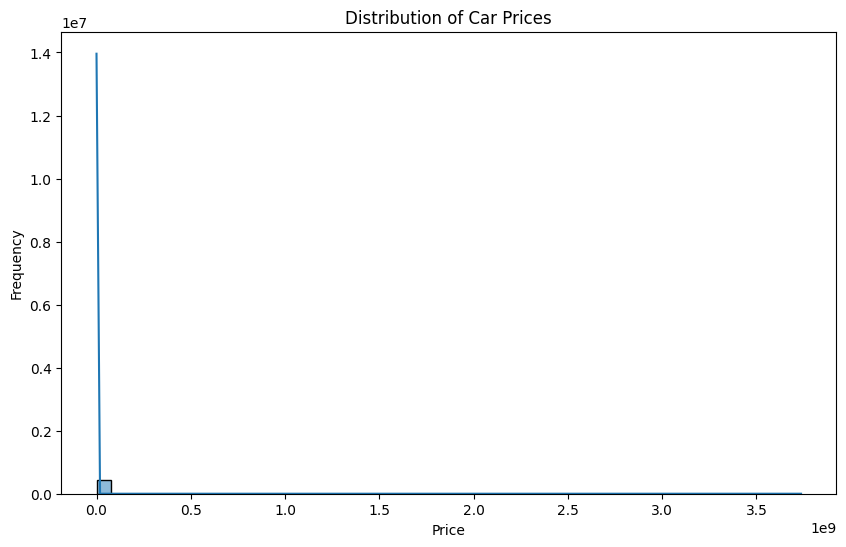

In [4]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

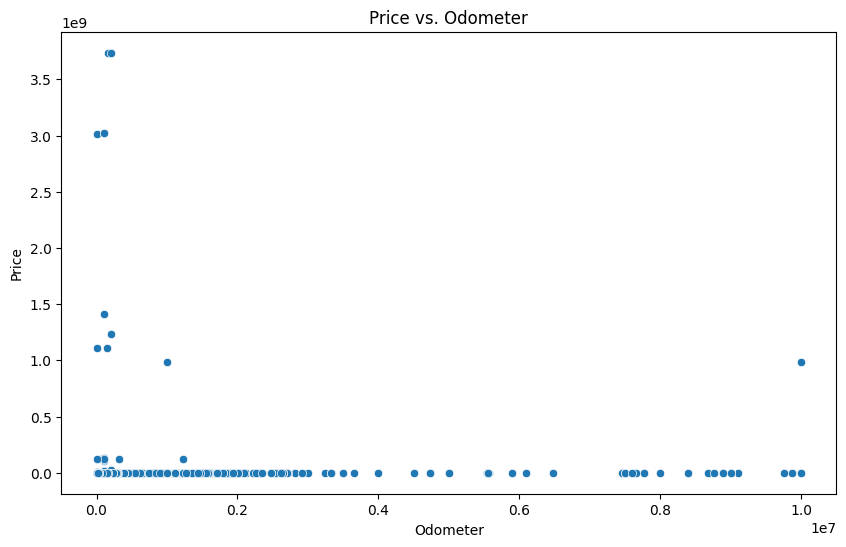

In [5]:
# Scatter plot of price vs odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['odometer'], y=df_cleaned['price'])
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

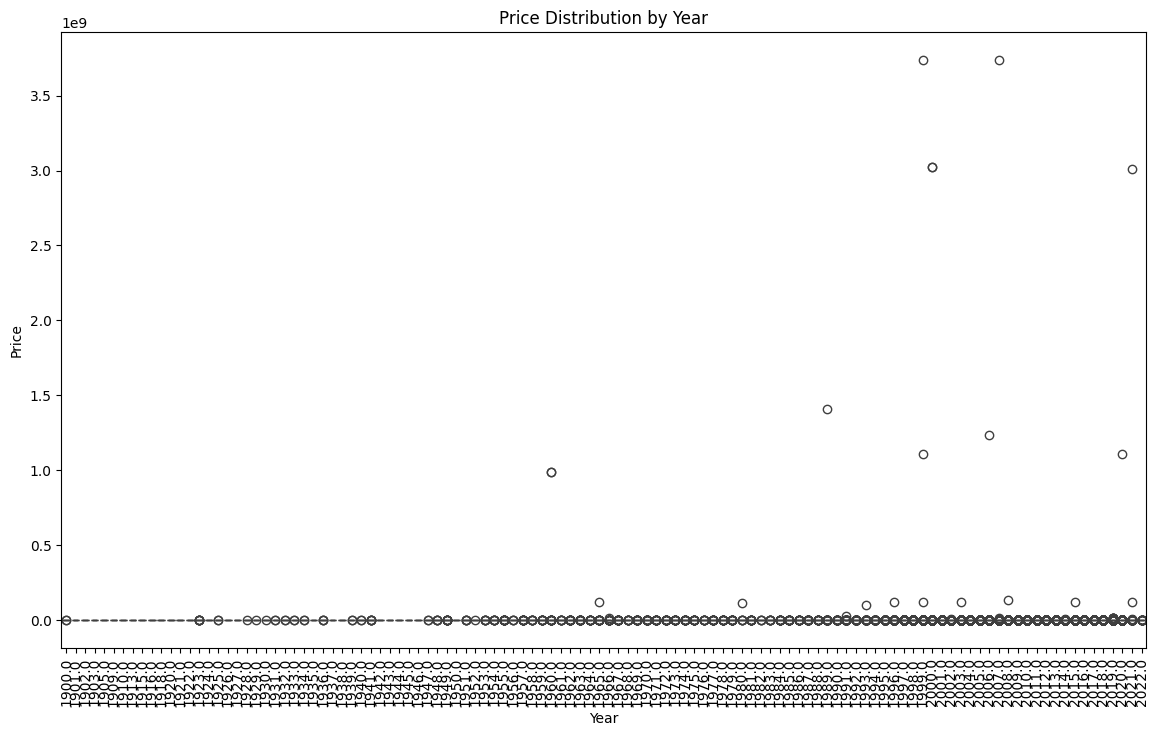

In [6]:
# Box plot of price distribution by year
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_cleaned['year'], y=df_cleaned['price'])
plt.title('Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

## 4. Modeling Attempts and Results

In [29]:
# Step 4: Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables using Label Encoding for modeling purposes
label_encoders = {}
# Added 'size' to the list of categorical columns
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'size']
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Defining features (X) and target variable (y)
X = df_cleaned.drop(['price', 'id', 'VIN'], axis=1)
y = df_cleaned['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

rf_mse, rf_r2

(418677902192951.06, -0.06952574038162185)

## 5. Conclusions and Recommendations

Based on the analysis, it is recommended that dealerships focus on the following factors to optimize their pricing strategies:

- **Car Age and Mileage**: Prioritize inventory with lower mileage and newer models, as these factors significantly impact car prices.
- **Key Features**: Highlight cars with favorable conditions, popular manufacturers, and appealing features that are shown to increase value.
- **Further Modeling**: Continued refinement of predictive models and the use of advanced algorithms will help improve price predictions and enhance inventory decision-making.

In [ ]:
# Box Plot of Prices by Car Manufacturer
plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y='price', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Box Plot of Prices by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

In [ ]:
# Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['price', 'year', 'odometer']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
# Bar Plot of Car Counts by Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df_cleaned, order=df_cleaned['condition'].value_counts().index)
plt.title('Count of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
# Line Plot of Average Price by Year
avg_price_by_year = df_cleaned.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=avg_price_by_year)
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Pie Chart of Car Distribution by Fuel Type
fuel_counts = df_cleaned['fuel'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cars by Fuel Type')
plt.axis('equal')
plt.show()

In [ ]:
# Count Plot of Car Transmission Types
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df_cleaned, order=df_cleaned['transmission'].value_counts().index)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()